# Task1 Of Mini Project 1
## AmirHossein Hadinezhad, Andrei Serban, Gabriel Alejandro Martinica Ardon

### Adding required libraries

In [169]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix

### Loading the data (part3)

In [170]:
sample =  datasets.load_files("BBC/", description="BBC Text Database",  encoding="latin1")

### Distribution Graph (Part2)

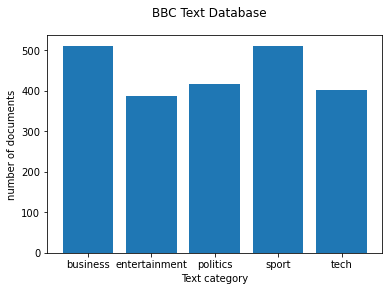

In [171]:
x_axis = sample.target_names
y_axis = [np.count_nonzero(sample.target==0),
         np.count_nonzero(sample.target==1),
         np.count_nonzero(sample.target==2),
         np.count_nonzero(sample.target==3),
         np.count_nonzero(sample.target==4)]

# plt.figure(figsize=(21, 12))
plt.plot()
plt.ylabel('number of documents')
plt.xlabel('Text category')
plt.bar(x_axis, y_axis)
plt.suptitle(sample.DESCR)
plt.savefig("BBC-distribution.pdf", format="pdf")
plt.show()


### Pre-processing the data (part4)

In [172]:
cv = CountVectorizer()
vocab = cv.fit_transform(sample.data)
x = vocab.toarray()
y = sample.target

### Split dataset for training and test (part5)

In [173]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = None)


 ### Train using Naive Bayes Classifier (part6)

In [174]:
naive_bayes_training = MultinomialNB()
naive_bayes_training.fit(X_train, y_train)


MultinomialNB()

 ### Create bbc-performance.txt to save the followinf information (part7)

In [175]:
f = open("bbc-performance.txt", "w")
f.close()

###  separator and describing model (part7a)

In [176]:
f = open("bbc-performance.txt", "a")
f.write("\n\t**********************************\n")
f.write("\n\tMultinomialNB default values, try 1\n\n\n")
f.close()

####  Confusion Metrix (part7b)

#### precision, recall, and F1-measure for each class (part7c)

#### accuracy, macro-average F1 and weighted-average F1 of the model (part7d)

#### prior probability of each class (part7e)

#### size of the vocabulary (part7f)

#### number of word-tokens in each class (part7g)

#### number of word-tokens in the entire corpus (parth)


#### Words with a frequency of zero in each class (part7i)

In [177]:
f = open("bbc-performance.txt", "a")
f.write("\nWords with a frequency of zero in each class (part7i)\n")
w = np.concatenate((x, y[:,None]), axis=1)

business=[]
entertainment=[]
politics=[]
sport=[]
tech=[]
for item in w:
    if(item[-1]==0):
        business.append(item)
    if(item[-1]==1):
        entertainment.append(item)
    if(item[-1]==2):
        politics.append(item)
    if(item[-1]==3):
        sport.append(item)
    if(item[-1]==4):
        tech.append(item)
        


f.write("Num of Total unique words "+ repr(x.shape[1])) 
business = np.array(business)
zeros_in_business = np.count_nonzero(business.sum(axis=0)==0)
f.write("\n num of Z in business: "+ repr((zeros_in_business-1))+ " ,Percentage: "+ repr((zeros_in_business-1)/x.shape[1] *100))

entertainment = np.array(entertainment)
zeros_in_entertainment = np.count_nonzero(entertainment.sum(axis=0)==0)
f.write("\n num of Z in entertainment: "+ repr(zeros_in_entertainment)+ " ,Percentage: "+ repr(zeros_in_entertainment/x.shape[1] *100))

politics = np.array(politics)
zeros_in_politicst = np.count_nonzero(politics.sum(axis=0)==0)
f.write("\n num of Z in politics: "+ repr(zeros_in_politicst)+ " ,Percentage: "+ repr(zeros_in_politicst/x.shape[1] *100))

sport = np.array(sport)
zeros_in_sport= np.count_nonzero(sport.sum(axis=0)==0)
f.write("\n num of Z in sport: "+ repr(zeros_in_sport)+ " ,Percentage: "+ repr(zeros_in_sport/x.shape[1] *100))

tech = np.array(tech)
zeros_in_tech = np.count_nonzero(tech.sum(axis=0)==0)
f.write("\n num of Z in tech: "+ repr(zeros_in_tech)+ " ,Percentage: "+ repr(zeros_in_tech/x.shape[1] *100))

f.close()


 #### Words with a frequency of one in the entire corpus (part7j)

In [178]:
f = open("bbc-performance.txt", "a")
ones_in_tottal = np.count_nonzero(x.sum(axis=0)==1)
f.write("\n\nWords with a frequency of one in the entire corpus (part7j)\n")
f.write("number of words with a frequency of one in the entire corpus: "+ repr(ones_in_tottal) )
f.write("\nPercentage: "+ repr ((ones_in_tottal/x.shape[1]) *100))
f.close()


#### log-prob of 2 favorite words (part7k)

 ###  MultinomialNB default values, try 2 (part8)

#### separator and describing model (MultinomialNB default2)

In [179]:
f = open("bbc-performance.txt", "a")
f.write("\n\n\n\n\t**********************************\n")
f.write("\n\tMultinomialNB default values, try 2\n\n\n")
f.close()

 #### Train using Naive Bayes Classifier

In [180]:
naive_bayes_training2 = MultinomialNB()
naive_bayes_training2.fit(X_train, y_train)

MultinomialNB()

 #### Confusion Metrix

In [181]:
f = open("bbc-performance.txt", "a")
f.write("\nConfusion Metrix: \n")
y_predicted = naive_bayes_training2.predict(X_test)
f.write(repr(confusion_matrix(y_test, y_predicted)))
f.close()

#### precision, recall, and F1-measure for each class

#### accuracy, macro-average F1 and weighted-average F1 of the model 

#### prior probability of each class

#### size of the vocabulary

#### number of word-tokens in each class

#### number of word-tokens in the entire corpus

#### Words with a frequency of zero in each class

#### Words with a frequency of one in the entire corpus

#### log-prob of 2 favorite words

 ###  MultinomialNB with smoothing value of 0.0001(part9)

#### separator and describing model (MultinomialNB with smoothing value of 0.0001)

In [182]:
f = open("bbc-performance.txt", "a")
f.write("\n\n\n\n\t**********************************\n")
f.write("\n\tMultinomialNB with smoothing value of 0.0001\n\n\n")
f.close()

 #### Train using Naive Bayes Classifier

In [183]:
naive_bayes_training_smoothing = MultinomialNB(alpha=0.0001)
naive_bayes_training_smoothing.fit(X_train, y_train)

MultinomialNB(alpha=0.0001)

 #### Confusion Metrix

In [184]:
f = open("bbc-performance.txt", "a")
f.write("\nConfusion Metrix: \n")
y_predicted = naive_bayes_training_smoothing.predict(X_test)
f.write(repr(confusion_matrix(y_test, y_predicted)))
f.close()

#### precision, recall, and F1-measure for each class

#### accuracy, macro-average F1 and weighted-average F1 of the model 

#### prior probability of each class

#### size of the vocabulary

#### number of word-tokens in each class

#### number of word-tokens in the entire corpus

#### Words with a frequency of zero in each class

#### Words with a frequency of one in the entire corpus

#### log-prob of 2 favorite words

 ###  MultinomialNB with smoothing value of 0.9(part10)

#### separator and describing model (MultinomialNB with smoothing value of 0.9)

In [185]:
f = open("bbc-performance.txt", "a")
f.write("\n\n\n\n\t**********************************\n")
f.write("\n\tMultinomialNB with smoothing value of 0.9\n\n\n")
f.close()

 #### Train using Naive Bayes Classifier

In [186]:
naive_bayes_training_smoothing2 = MultinomialNB(alpha=0.9)
naive_bayes_training_smoothing2.fit(X_train, y_train)

MultinomialNB(alpha=0.9)

 #### Confusion Metrix

In [187]:
f = open("bbc-performance.txt", "a")
f.write("\nConfusion Metrix: \n")
y_predicted = naive_bayes_training_smoothing2.predict(X_test)
confusion_matrix(y_test, y_predicted)
f.write(repr(confusion_matrix(y_test, y_predicted)))
f.close()

#### precision, recall, and F1-measure for each class

#### accuracy, macro-average F1 and weighted-average F1 of the model 

#### prior probability of each class

#### size of the vocabulary

#### number of word-tokens in each class

#### number of word-tokens in the entire corpus

#### Words with a frequency of zero in each class

#### Words with a frequency of one in the entire corpus

#### log-prob of 2 favorite words